#MUHAMMAD KHUBAIB - MK07218

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [13]:
df = pd.read_csv('McDonaldsMenu.csv')

In [14]:
#Q1
df.drop(['Category','Item'],axis=1,inplace=True)

In [15]:
#Q2
df.drop(['Serving Size'],axis=1,inplace=True)
#df['Calories'].max()

1880

In [17]:
#Q3
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled)

[[0.15957447 0.11320755 0.11016949 ... 0.         0.35714286 0.375     ]
 [0.13297872 0.06603774 0.06779661 ... 0.         0.35714286 0.2       ]
 [0.19680851 0.18867925 0.19491525 ... 0.         0.35714286 0.25      ]
 ...
 [0.18085106 0.09433962 0.09322034 ... 0.         0.35714286 0.15      ]
 [0.43085106 0.27358491 0.27118644 ... 0.         0.85714286 0.15      ]
 [0.21808511 0.14150943 0.13559322 ... 0.         0.42857143 0.1       ]]


In [37]:
#Q4
wss = []
sil = []

warnings.filterwarnings('ignore')

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 100)
    kmeans.fit(df_scaled)
    wss.append(kmeans.inertia_)
    if i > 1:
        sil.append(silhouette_score(df_scaled, kmeans.labels_))

print(sil)
warnings.filterwarnings('default')

[0.3336826549063796, 0.36435579185509454, 0.3663171512905509, 0.29311810239100894, 0.2919368990064542, 0.2996140911703206, 0.28555108501066806, 0.26991832436982094, 0.26846786108087456, 0.27854194216942973, 0.2834790765721287, 0.30606975081457966, 0.2769209924227067]


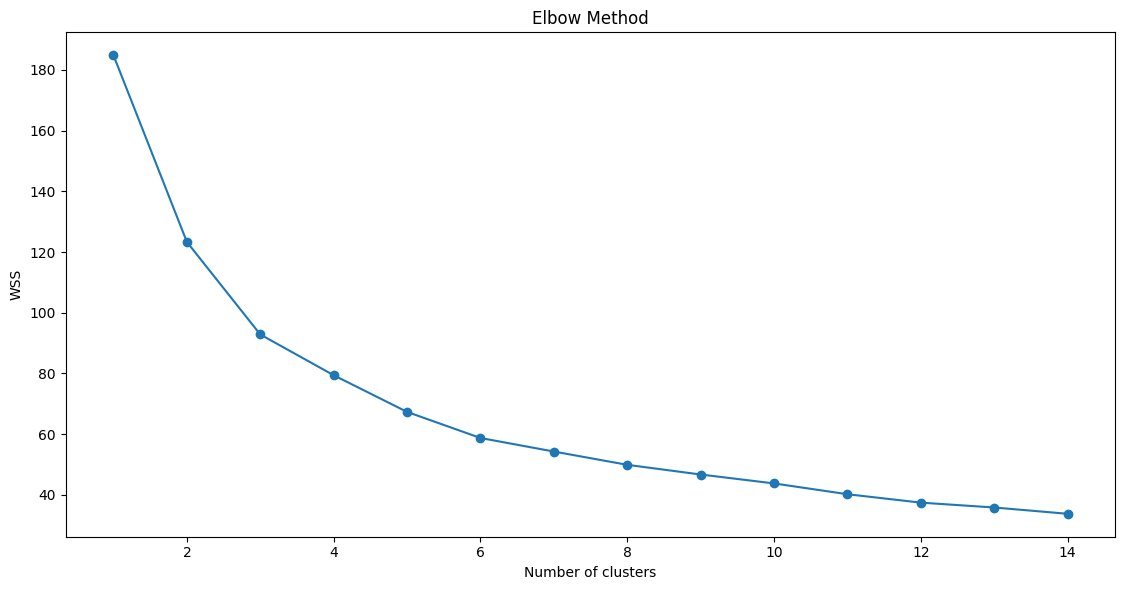

In [35]:
plt.figure(figsize=(22, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 15), wss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')

plt.tight_layout()
plt.show()


### From the elbow method graph, it can be observed that the graph line starts to flatten and no longer decreases significantly when the elbow point is at k=3. This indicates that our optimal number of clusters is 3, something which is also supported by the high silhouette score for k=3. Hence, the optimal number of clusters is 3.

In [44]:
#Q5

kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 100)
result = kmeans.fit_predict(df_scaled)
print(result)

[2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2
 1 1 2 1 1 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2
 2 2 2 2 1 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


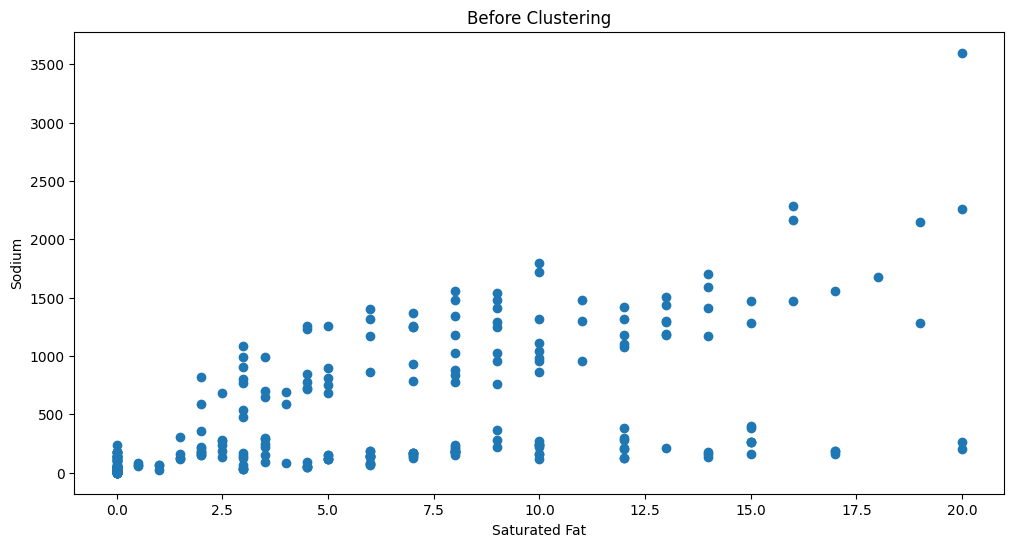

In [49]:
#Q6

plt.figure(figsize=(12,6))
plt.scatter(x = df['Saturated Fat'], y = df['Sodium'])
plt.xlabel('Saturated Fat')
plt.ylabel('Sodium')
plt.title('Before Clustering')
plt.show()

### The scatter plot shows the data before clustering. The data is well spreadout over the given range. A positive corelation is seen although we do have certain outliers as well

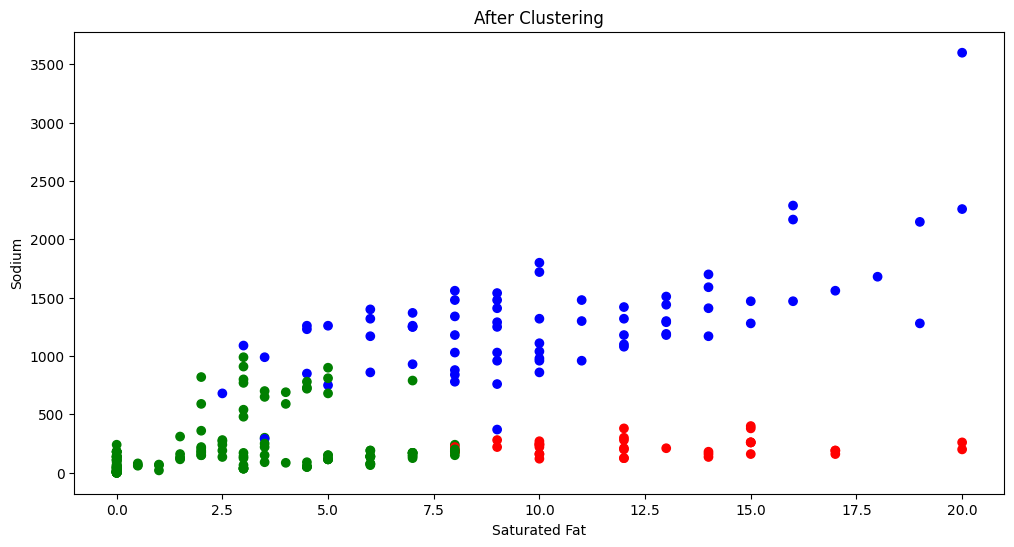

In [50]:
plt.figure(figsize=(12,6))
colors = np.array(['red', 'green', 'blue', 'yellow'])
plt.scatter(x = df['Saturated Fat'], y = df['Sodium'], c=colors[kmeans.labels_])
plt.xlabel('Saturated Fat')
plt.ylabel('Sodium')
plt.title('After Clustering')
plt.show()

### The scatter plot is the after clustering of the data. The scatter plot shows that the data is divided into three groups/clusters as indicated by the three colors seen.

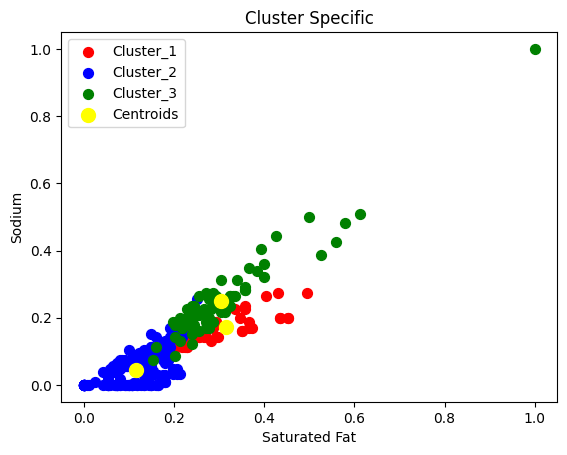

In [60]:
plt.scatter(df_scaled[result == 0, 0], df_scaled[result == 0, 1], s = 50, c = 'red', label = 'Cluster_1')
plt.scatter(df_scaled[result == 1, 0], df_scaled[result == 1, 1], s = 50, c = 'blue', label = 'Cluster_2')
plt.scatter(df_scaled[result == 2, 0], df_scaled[result == 2, 1], s = 50, c = 'green', label = 'Cluster_3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.xlabel('Saturated Fat')
plt.ylabel('Sodium')
plt.title('Cluster Specific')
plt.legend()
plt.show()

### There are 3 clusters in the data as indicated in our scatter plot. Eventhough there are some outliers, the clusters are well defined overall and the data is concentrated around the clusters. Cluster 2 has low sodium and saturated fat than the others.

In [66]:
#Q7

C1 = df.iloc[result == 0, :]
C2 = df.iloc[result == 1, :]
C3 = df.iloc[result == 2, :]

In [68]:
#Q8

C1.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000
mean,593.243243,181.621622,20.216216,31.081081,12.378378,61.729730,0.770270,64.189189,21.405405,220.135135,...,89.972973,29.945946,0.891892,3.918919,78.378378,13.486486,19.054054,0.0,44.324324,4.405405
std,149.463003,47.755949,5.218211,8.101366,3.311188,16.992888,0.401293,18.047527,5.856902,68.814227,...,26.349664,8.787447,0.698561,2.994239,21.727289,3.556072,5.507298,0.0,12.481217,3.692782
min,390.000000,120.000000,14.000000,21.000000,8.000000,39.000000,0.000000,35.000000,11.000000,120.000000,...,55.000000,18.000000,0.000000,0.000000,50.000000,7.000000,10.000000,0.0,20.000000,0.000000
25%,460.000000,150.000000,16.000000,25.000000,10.000000,49.000000,0.500000,50.000000,17.000000,180.000000,...,65.000000,22.000000,0.000000,0.000000,59.000000,11.000000,15.000000,0.0,35.000000,2.000000
50%,550.000000,170.000000,19.000000,29.000000,12.000000,60.000000,1.000000,60.000000,21.000000,210.000000,...,86.000000,29.000000,1.000000,4.000000,71.000000,14.000000,20.000000,0.0,45.000000,4.000000
75%,690.000000,210.000000,23.000000,35.000000,15.000000,73.000000,1.000000,75.000000,25.000000,260.000000,...,109.000000,36.000000,1.000000,6.000000,93.000000,15.000000,20.000000,0.0,50.000000,8.000000
max,930.000000,290.000000,33.000000,50.000000,20.000000,102.000000,1.500000,95.000000,32.000000,400.000000,...,141.000000,47.000000,2.000000,10.000000,128.000000,21.000000,30.000000,0.0,70.000000,15.000000


Axes(0.125,0.11;0.775x0.77)


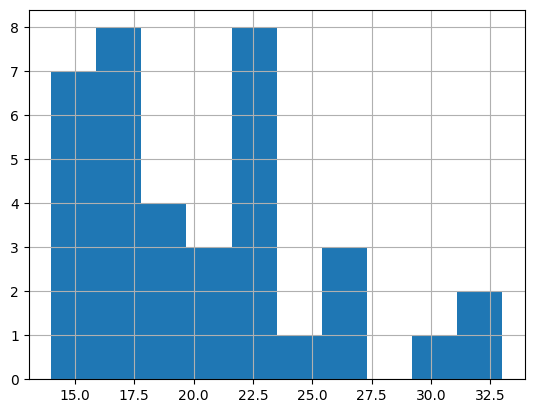

In [71]:
print(C1['Total Fat'].hist())

### C1 has a, overall higher total fat with a great amount of saturated fats, and sodium. It also has a high level of Carbohydrates indicating that these are either sweet or oily substances.

In [69]:
C2.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,216.357616,47.384106,5.324503,8.185430,2.423841,11.966887,0.003311,16.887417,5.761589,183.708609,...,35.576159,11.86755,1.019868,4.000000,27.536424,7.086093,9.529801,10.125828,16.556291,3.092715
std,114.587570,51.613417,5.748101,8.776031,2.521738,12.339323,0.040689,18.227650,6.160853,226.476241,...,20.632478,6.90186,1.202609,4.753946,21.936507,6.403062,21.610741,33.400460,16.630749,4.325661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,...,21.500000,7.00000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,240.000000,35.000000,4.000000,6.000000,2.000000,10.000000,0.000000,10.000000,3.000000,125.000000,...,38.000000,13.00000,1.000000,3.000000,27.000000,7.000000,4.000000,0.000000,10.000000,2.000000
75%,300.000000,80.000000,9.000000,14.000000,4.500000,22.000000,0.000000,30.000000,9.500000,180.000000,...,50.000000,17.00000,1.000000,6.000000,45.000000,12.000000,10.000000,2.000000,30.000000,6.000000
max,470.000000,270.000000,30.000000,45.000000,8.000000,39.000000,0.500000,115.000000,38.000000,990.000000,...,79.000000,26.00000,6.000000,23.000000,76.000000,29.000000,170.000000,240.000000,60.000000,20.000000


<Axes: xlabel='Sodium', ylabel='Count'>

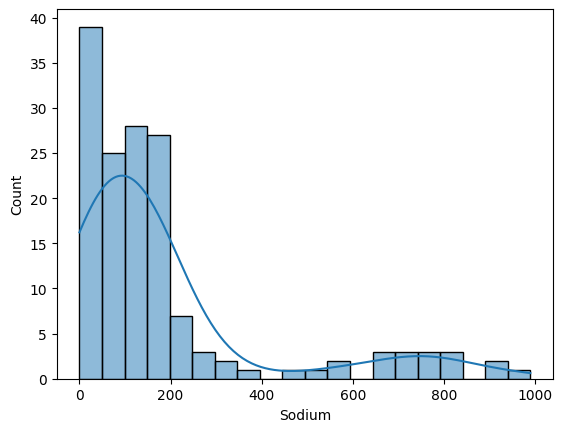

In [17]:
sns.histplot(C2['Sodium'], kde=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Axes(0.125,0.11;0.775x0.77)


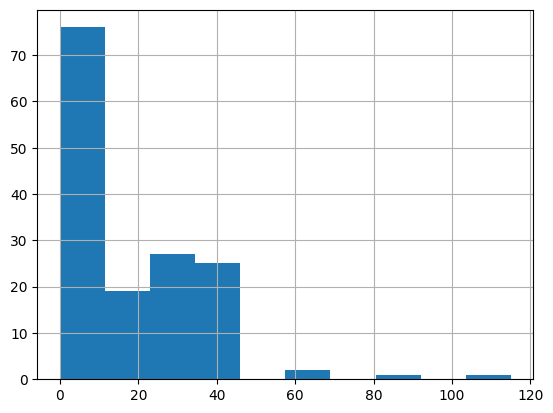

In [74]:
print(C2['Cholesterol'].hist())

### C2 has a lot of cholesterol, sodium, and proteins. One other thing visible was that it has a greater amount of Vitamin C, which seemed to be missing in C1. The data of C2 is mainly influenced from meals such as lunch or dinner which are the main meals of the day and eaten in large quantities.

In [25]:
C3.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,571.250000,266.250000,29.597222,45.638889,10.250000,51.388889,0.333333,130.000000,43.333333,1291.805556,...,50.125000,16.708333,3.291667,13.180556,8.222222,26.375000,18.708333,9.583333,18.236111,19.180556
std,232.996025,134.786608,15.025480,23.147601,4.195907,20.986619,0.562940,134.452463,44.887339,463.180452,...,20.271355,6.772849,1.336777,5.549588,5.672325,11.301798,32.964957,11.428590,7.755948,6.832661
min,290.000000,80.000000,8.000000,13.000000,2.500000,13.000000,0.000000,0.000000,0.000000,290.000000,...,22.000000,7.000000,2.000000,6.000000,0.000000,6.000000,0.000000,0.000000,2.000000,8.000000
25%,447.500000,197.500000,22.000000,33.000000,7.750000,39.000000,0.000000,50.000000,16.750000,1030.000000,...,38.750000,13.000000,2.000000,9.000000,3.000000,20.000000,4.000000,2.000000,15.000000,15.000000
50%,510.000000,235.000000,26.000000,40.000000,10.000000,48.000000,0.000000,80.000000,27.000000,1260.000000,...,45.500000,15.000000,3.000000,12.000000,7.000000,25.000000,8.000000,8.000000,20.000000,20.000000
75%,612.500000,290.000000,32.250000,49.250000,13.000000,64.250000,0.500000,141.250000,46.250000,1470.000000,...,56.000000,19.000000,4.000000,15.000000,12.000000,32.000000,15.000000,15.000000,25.000000,20.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,101.000000,2.500000,575.000000,192.000000,3600.000000,...,118.000000,39.000000,7.000000,28.000000,32.000000,87.000000,170.000000,70.000000,30.000000,40.000000


<Axes: xlabel='Iron (% Daily Value)', ylabel='Count'>

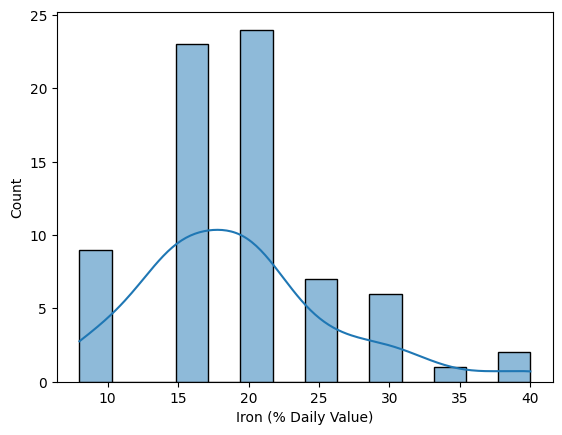

In [73]:
sns.histplot(data=C3, x="Iron (% Daily Value)", kde=True)

### C3 has a high amount of sodium intake whereas the calories intake is generally less. There is also a great amount of Iron that is visible. There are also significant amounts of carbohydrates.

#Q9
###C1: Fat Fanatics; as it has a high amount of saturated fats
###C2: Scurvy Fighters; as it has a lot of Vitamin C
###C3: Sodium Supporters; as it has a high amount of sodium